# Modeling

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import random
random.seed(222)

In [2]:
X_train_l = pd.read_csv('./data/l_Xtrain.csv', index_col='Unnamed: 0')
X_test_l = pd.read_csv('./data/l_Xtest.csv', index_col='Unnamed: 0')

y_train_l = pd.read_csv('./data/l_ytrain.csv', index_col='Unnamed: 0')
y_test_l = pd.read_csv('./data/l_ytest.csv', index_col='Unnamed: 0')

X_train_r = pd.read_csv('./data/X_train_r.csv', index_col='Unnamed: 0')
X_test_r = pd.read_csv('./data/X_test_r.csv', index_col='Unnamed: 0')


y_train_r = pd.read_csv('./data/y_train_r.csv', index_col='Unnamed: 0')
y_test_r = pd.read_csv('./data/y_test_r.csv', index_col='Unnamed: 0')

In [3]:
y_train_l = y_train_l['type']
y_test_l = y_test_l['type']

In [4]:
X_train_l.columns

Index(['host_total_listings_count', 'accommodates', 'bedrooms', 'beds',
       'price', 'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'host_response_time_within a day',
       'host_response_time_within a few hours',
       'host_response_time_within an hour', 'host_identity_verified_t',
       'property_type_Casa particular',
       'property_type_Entire bed and breakfast', 'property_type_Entire condo',
       'property_type_Entire guest suite', 'property_type_Entire guesthouse',
       'property_type_Entire home', 'property_type_Entire home/apt',
       'property_type_Entire loft', 'property_type_Entire rental unit',
       'property_type_Entire serviced apartment',
       'property_type_Entire townhouse', 'property_type_Entire vacation home',
       'property_type_Entire villa', 'property_type_Floor',
       'property_type_Private room in bed and breakfast',
       'property_type_Private room in boat',
       'property_type_Private room in condo',
       'property_

In [5]:
r_X_train =  X_train_r['lem_comments']
r_X_test = X_test_r['lem_comments']

r_y_train = y_train_r['type']
r_y_test = y_test_r['type']

# Listings Classification Modeling

## Logistic Regression

In [8]:
X_train_l.columns

Index(['host_total_listings_count', 'accommodates', 'bedrooms', 'beds',
       'price', 'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'host_response_time_within a day',
       'host_response_time_within a few hours',
       'host_response_time_within an hour', 'host_identity_verified_t',
       'property_type_Casa particular',
       'property_type_Entire bed and breakfast', 'property_type_Entire condo',
       'property_type_Entire guest suite', 'property_type_Entire guesthouse',
       'property_type_Entire home', 'property_type_Entire home/apt',
       'property_type_Entire loft', 'property_type_Entire rental unit',
       'property_type_Entire serviced apartment',
       'property_type_Entire townhouse', 'property_type_Entire vacation home',
       'property_type_Entire villa', 'property_type_Floor',
       'property_type_Private room in bed and breakfast',
       'property_type_Private room in boat',
       'property_type_Private room in condo',
       'property_

In [9]:
logreg = LogisticRegression(max_iter = 10000000)

In [10]:
logreg.fit(X_train_l, y_train_l)

LogisticRegression(max_iter=10000000)

In [11]:
print(f' Train accuracy: {logreg.score(X_train_l, y_train_l)}, Test accuracy: {logreg.score(X_test_l, y_test_l)}')

 Train accuracy: 0.7021276595744681, Test accuracy: 0.6842105263157895


In [12]:
y_pred_logreg = logreg.predict(X_test_l)

In [13]:
tn_lr, fp_lr, fn_lr, tp_lr = confusion_matrix(y_test_l, y_pred_logreg).ravel()

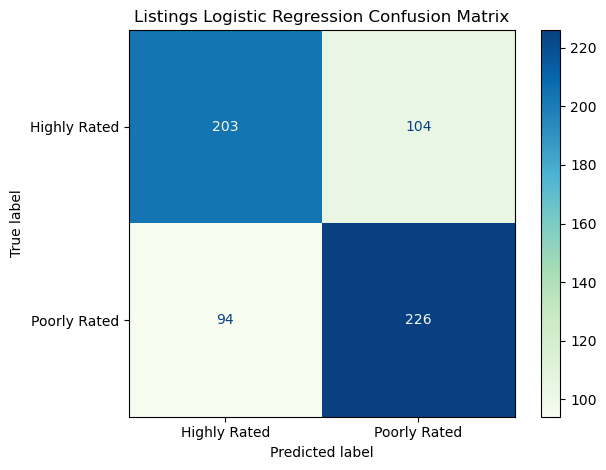

In [102]:
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_l, y_pred_logreg),
                      display_labels=['Highly Rated', 'Poorly Rated']);
cmd.plot(cmap = 'GnBu')
plt.title('Listings Logistic Regression Confusion Matrix')
plt.tight_layout()
plt.savefig('./visualizations/llgcm.jpg', bbox_inches = 'tight');

In [15]:
#Sensitivity 
print(f' Sensitivity: {tp_lr / (tp_lr+fn_lr)}')
#Specificity
print(f' Specificity: {tn_lr / (tn_lr+fp_lr)}')
#Precision 
print(f' Precision: {tp_lr/(tp_lr+fp_lr)}')

 Sensitivity: 0.70625
 Specificity: 0.6612377850162866
 Precision: 0.6848484848484848


This logistic regression model had a train accuracy of 0.70 and a test accuracy of 0.68. The model sensitivity was 0.71, the specificity was 0.66, and the precision was 0.68. This model had above baseline accuracy but was not our best performing model.The model was slightly worse at classifying highly rated listings correctly than poorly rated listings.

## K Neighbors Classifier

In [16]:
pipe_cvec_knn = Pipeline([
    ('ss', StandardScaler(with_mean = True)),
    ('knn', KNeighborsClassifier())
])

pipe_cvec_knn_params = {
    'knn__n_neighbors': [3, 5, 7],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['minkowski', 'euclidean', 'manhattan']
    
}

gs_cvec_knn = GridSearchCV(pipe_cvec_knn, pipe_cvec_knn_params, n_jobs = -1)
gs_cvec_knn.fit(X_train_l, y_train_l)

GridSearchCV(estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__metric': ['minkowski', 'euclidean', 'manhattan'],
                         'knn__n_neighbors': [3, 5, 7],
                         'knn__weights': ['uniform', 'distance']})

In [17]:
print(f' Train accuracy: {gs_cvec_knn.score(X_train_l, y_train_l)}, Test accuracy: {gs_cvec_knn.score(X_test_l, y_test_l)}')

 Train accuracy: 1.0, Test accuracy: 0.6347687400318979


In [18]:
gs_cvec_knn.best_params_

{'knn__metric': 'manhattan', 'knn__n_neighbors': 5, 'knn__weights': 'distance'}

In [19]:
y_pred_knn = gs_cvec_knn.predict(X_test_l)

In [20]:
tn_knn, fp_knn, fn_knn, tp_knn = confusion_matrix(y_test_l, y_pred_knn).ravel()

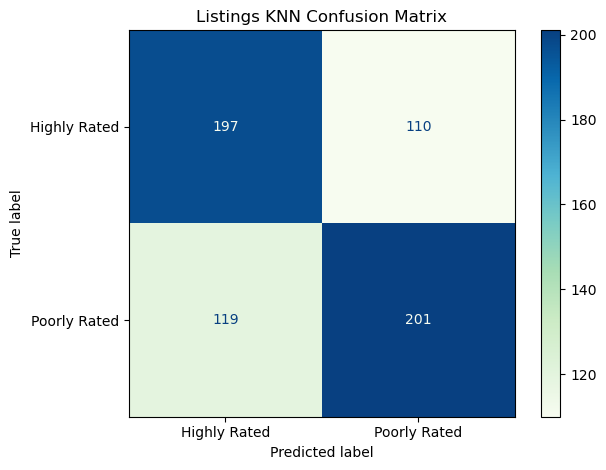

In [103]:
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_l, y_pred_knn),
                      display_labels=['Highly Rated', 'Poorly Rated']);
cmd.plot(cmap = 'GnBu')
plt.title('Listings KNN Confusion Matrix')
plt.tight_layout()
plt.savefig('./visualizations/lknncm.jpg', bbox_inches = 'tight');

In [22]:
#Sensitivity 
print(f' Sensitivity: {tp_knn / (tp_knn+fn_knn)}')
#Specificity
print(f' Specificity: {tn_knn / (tn_knn+fp_knn)}')
#Precision 
print(f' Precision: {tp_knn/(tp_knn+fp_knn)}')

 Sensitivity: 0.628125
 Specificity: 0.6416938110749185
 Precision: 0.6463022508038585


The KNN best parameters were: 'knn__metric': 'manhattan', 'knn__n_neighbors': 5, 'knn__weights': 'distance'. This model had an accuracy score of 1 on the train data and 0.63 on the test data. This model was severely overfit. On test data, the model sensitivity was 0.63, the model specificity was 0.64, and the model precision was 0.65. The model was about the same at classifying both classes.

## Decision Tree Classifier

In [23]:
pipe_cvec_dt = Pipeline([
    ('dt', DecisionTreeClassifier(random_state = 222))
])

pipe_cvec_dt_params = {
    'dt__max_depth': [3, 5, 8],
    'dt__min_samples_leaf': [1, 2, 5]
    
}

gs_cvec_dt = GridSearchCV(pipe_cvec_dt, pipe_cvec_dt_params, n_jobs = -1)
gs_cvec_dt.fit(X_train_l, y_train_l)


GridSearchCV(estimator=Pipeline(steps=[('dt',
                                        DecisionTreeClassifier(random_state=222))]),
             n_jobs=-1,
             param_grid={'dt__max_depth': [3, 5, 8],
                         'dt__min_samples_leaf': [1, 2, 5]})

In [24]:
print(f' Train accuracy: {gs_cvec_dt.score(X_train_l, y_train_l)}, Test accuracy: {gs_cvec_dt.score(X_test_l, y_test_l)}')

 Train accuracy: 0.7632978723404256, Test accuracy: 0.7208931419457735


In [25]:
gs_cvec_dt.best_params_

{'dt__max_depth': 8, 'dt__min_samples_leaf': 5}

In [26]:
y_pred_dt = gs_cvec_dt.predict(X_test_l)

In [27]:
tn_dt, fp_dt, fn_dt, tp_dt = confusion_matrix(y_test_l, y_pred_dt).ravel()

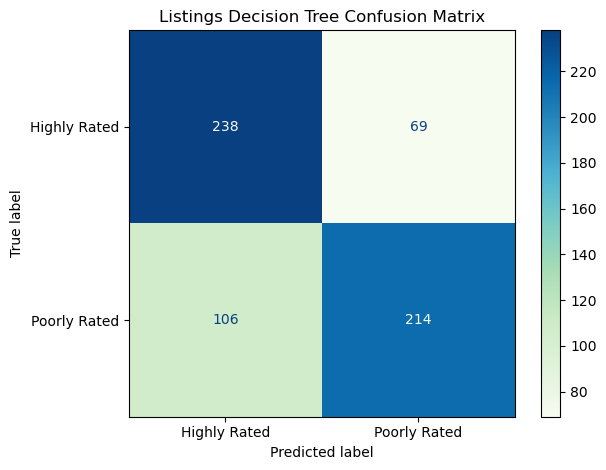

In [104]:
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_l, y_pred_dt),
                      display_labels=['Highly Rated', 'Poorly Rated']);
cmd.plot(cmap = 'GnBu')
plt.title('Listings Decision Tree Confusion Matrix')
plt.tight_layout()
plt.savefig('./visualizations/ldtcm.jpg', bbox_inches = 'tight');

In [29]:
#Sensitivity 
print(f' Sensitivity: {tp_dt / (tp_dt+fn_dt)}')
#Specificity
print(f' Specificity: {tn_dt / (tn_dt+fp_dt)}')
#Precision 
print(f' Precision: {tp_dt/(tp_dt+fp_dt)}')

 Sensitivity: 0.66875
 Specificity: 0.7752442996742671
 Precision: 0.7561837455830389


The Decision Tree best parameters were: 'dt__max_depth': 8, 'dt__min_samples_leaf': 5. This model had an accuracy score of 0.76 on the train data and 0.72 on the test data. On test data, the model sensitivity was 0.67, the model specificity was 0.78, and the model precision was 0.76. This model had some difficulty classifying poorly rated listings, frequently labeling them as highly rated, as shown by the very lower sensitivity score. 

## Random Forests Classifier

In [30]:
pipe_cvec_rf = Pipeline([
    ('rf', RandomForestClassifier(random_state =222))
])

pipe_cvec_rf_params = {
    'rf__n_estimators': [100, 125, 150],
    'rf__max_depth': [3, 5, 8],
    'rf__min_samples_leaf': [1, 2, 5]
    
}

gs_cvec_rf = GridSearchCV(pipe_cvec_rf, pipe_cvec_rf_params, n_jobs = -1)
gs_cvec_rf.fit(X_train_l, y_train_l)

GridSearchCV(estimator=Pipeline(steps=[('rf',
                                        RandomForestClassifier(random_state=222))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [3, 5, 8],
                         'rf__min_samples_leaf': [1, 2, 5],
                         'rf__n_estimators': [100, 125, 150]})

In [31]:
print(f' Train accuracy: {gs_cvec_rf.score(X_train_l, y_train_l)}, Test accuracy: {gs_cvec_rf.score(X_test_l, y_test_l)}')

 Train accuracy: 0.801595744680851, Test accuracy: 0.7145135566188198


In [32]:
gs_cvec_rf.best_params_

{'rf__max_depth': 8, 'rf__min_samples_leaf': 2, 'rf__n_estimators': 150}

In [33]:
y_pred_rf = gs_cvec_rf.predict(X_test_l)

In [34]:
tn_rf, fp_rf, fn_rf, tp_rf = confusion_matrix(y_test_l, y_pred_rf).ravel()

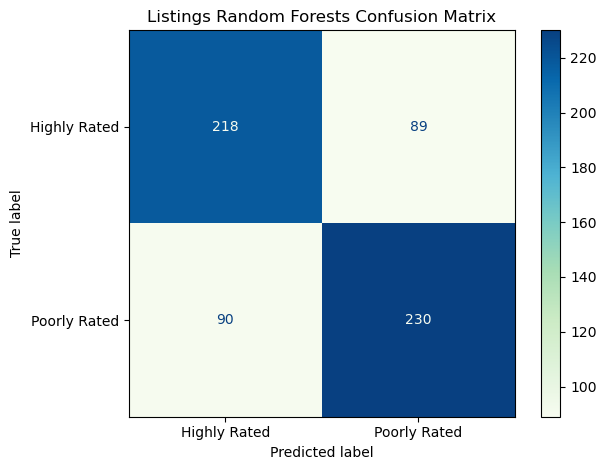

In [105]:
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_l, y_pred_rf),
                      display_labels=['Highly Rated', 'Poorly Rated']);
cmd.plot(cmap = 'GnBu')
plt.title('Listings Random Forests Confusion Matrix')
plt.tight_layout()
plt.savefig('./visualizations/lrtcm.jpg', bbox_inches = 'tight');

In [36]:
#Sensitivity 
print(f' Sensitivity: {tp_rf / (tp_rf+fn_rf)}')
#Specificity
print(f' Specificity: {tn_rf / (tn_rf+fp_rf)}')
#Precision 
print(f' Precision: {tp_rf/(tp_rf+fp_rf)}')

 Sensitivity: 0.71875
 Specificity: 0.7100977198697068
 Precision: 0.7210031347962382


The Random Forest best parameters were: 'rf__max_depth': 8, 'rf__min_samples_leaf': 2, 'rf__n_estimators': 150. This model had an accuracy score of 0.80 on the train data and 0.71 on the test data. On test data, the model sensitivity was 0.72, the model specificity was 0.71, and the model precision was 0.72. This model performed better than the baseline accuracy but was slightly overfit. 

## AdaBoost Classifier

In [37]:
pipe_cvec_ada = Pipeline([
    ('ada', AdaBoostClassifier(random_state =222))
])

pipe_cvec_ada_params = {
    'ada__n_estimators': [100, 125, 150],
    'ada__learning_rate': [1.0, 1.5]
    
}

gs_cvec_ada = GridSearchCV(pipe_cvec_ada, pipe_cvec_ada_params, n_jobs = -1)
gs_cvec_ada.fit(X_train_l, y_train_l)

GridSearchCV(estimator=Pipeline(steps=[('ada',
                                        AdaBoostClassifier(random_state=222))]),
             n_jobs=-1,
             param_grid={'ada__learning_rate': [1.0, 1.5],
                         'ada__n_estimators': [100, 125, 150]})

In [38]:
print(f' Train accuracy: {gs_cvec_ada.score(X_train_l, y_train_l)}, Test accuracy: {gs_cvec_ada.score(X_test_l, y_test_l)}')

 Train accuracy: 0.75, Test accuracy: 0.7113237639553429


In [39]:
gs_cvec_ada.best_params_

{'ada__learning_rate': 1.5, 'ada__n_estimators': 150}

In [40]:
y_pred_ada = gs_cvec_ada.predict(X_test_l)

In [41]:
tn_ada, fp_ada, fn_ada, tp_ada = confusion_matrix(y_test_l, y_pred_ada).ravel()

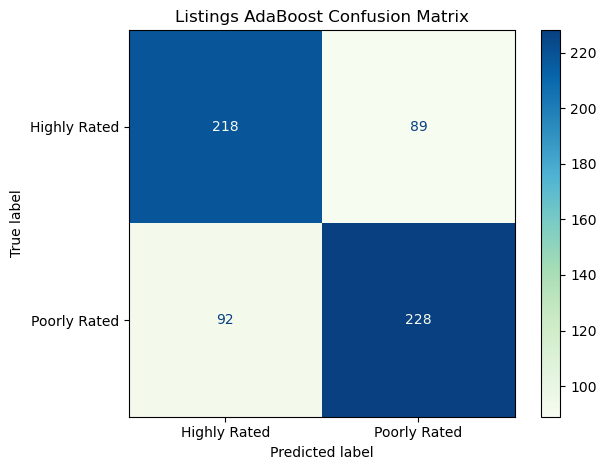

In [106]:
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_l, y_pred_ada),
                      display_labels=['Highly Rated', 'Poorly Rated']);
cmd.plot(cmap = 'GnBu')
plt.title('Listings AdaBoost Confusion Matrix')
plt.tight_layout()
plt.savefig('./visualizations/ladacm.jpg', bbox_inches = 'tight');

In [43]:
#Sensitivity 
print(f' Sensitivity: {tp_ada / (tp_ada+fn_ada)}')
#Specificity
print(f' Specificity: {tn_ada / (tn_ada+fp_ada)}')
#Precision 
print(f' Precision: {tp_ada/(tp_ada+fp_ada)}')

 Sensitivity: 0.7125
 Specificity: 0.7100977198697068
 Precision: 0.7192429022082019


The AdaBoost best parameters were: 'ada__learning_rate': 1.5, 'ada__n_estimators': 150. This model had an accuracy score of 0.75 on the train data and 0.71 on the test data. On test data, the model sensitivity was 0.71, the model specificity was 0.71, and the model precision was 0.72. This model performed similarly at identifying both highly and poorly rated listings.

## GradientBoost Classifier

In [44]:
pipe_cvec_g = Pipeline([
    ('g_boost', GradientBoostingClassifier(random_state = 222))
])

pipe_cvec_g_params = {
    'g_boost__n_estimators': [100, 125, 150],
    'g_boost__learning_rate': [0.8, 1.0, 1.5],
    'g_boost__min_samples_split': [2]
    
}

gs_cvec_g = GridSearchCV(pipe_cvec_g, pipe_cvec_g_params, n_jobs = -1)
gs_cvec_g.fit(X_train_l, y_train_l)

GridSearchCV(estimator=Pipeline(steps=[('g_boost',
                                        GradientBoostingClassifier(random_state=222))]),
             n_jobs=-1,
             param_grid={'g_boost__learning_rate': [0.8, 1.0, 1.5],
                         'g_boost__min_samples_split': [2],
                         'g_boost__n_estimators': [100, 125, 150]})

In [45]:
print(f' Train accuracy: {gs_cvec_g.score(X_train_l, y_train_l)}, Test accuracy: {gs_cvec_g.score(X_test_l, y_test_l)}')

 Train accuracy: 0.975531914893617, Test accuracy: 0.696969696969697


In [46]:
gs_cvec_g.best_params_

{'g_boost__learning_rate': 0.8,
 'g_boost__min_samples_split': 2,
 'g_boost__n_estimators': 150}

In [47]:
y_pred_g = gs_cvec_g.predict(X_test_l)

In [48]:
tn_g, fp_g, fn_g, tp_g = confusion_matrix(y_test_l, y_pred_g).ravel()

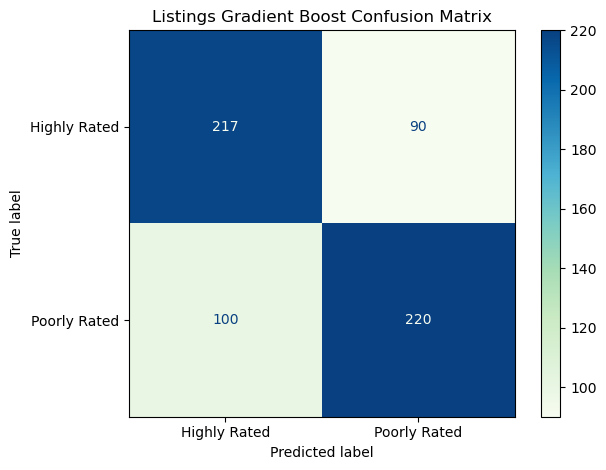

In [107]:
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_l, y_pred_g),
                      display_labels=['Highly Rated', 'Poorly Rated']);
cmd.plot(cmap = 'GnBu')
plt.title('Listings Gradient Boost Confusion Matrix')
plt.tight_layout()
plt.savefig('./visualizations/lgbcm.jpg', bbox_inches = 'tight');

In [50]:
#Sensitivity 
print(f' Sensitivity: {tp_g / (tp_g+fn_g)}')
#Specificity
print(f' Specificity: {tn_g / (tn_g+fp_g)}')
#Precision 
print(f' Precision: {tp_g/(tp_g+fp_g)}')

 Sensitivity: 0.6875
 Specificity: 0.7068403908794788
 Precision: 0.7096774193548387


The GradientBoost best parameters were: 'g_boost__learning_rate': 0.8, 'g_boost__n_estimators': 150. This model had an accuracy score of 0.98 on the train data and 0.70 on the test data. On test data, the model sensitivity was 0.69, the model specificity was 0.71, and the model precision was 0.71. This model performed better than baseline accuracy but was substantially overfit. 

## Bagging Classifier

In [51]:
pipe_cvec_bag = Pipeline([
    ('bag', BaggingClassifier(random_state = 222))
])

pipe_cvec_bag_params = {
    'bag__n_estimators': [50, 100, 150],
    'bag__max_samples': [0.65, 0.75, 0.85, 1.0],
    'bag__max_features': [0.65, 0.75, 0.85, 1.0]
    
}

gs_cvec_bag = GridSearchCV(pipe_cvec_bag, pipe_cvec_bag_params, n_jobs = -1)
gs_cvec_bag.fit(X_train_l, y_train_l)

GridSearchCV(estimator=Pipeline(steps=[('bag',
                                        BaggingClassifier(random_state=222))]),
             n_jobs=-1,
             param_grid={'bag__max_features': [0.65, 0.75, 0.85, 1.0],
                         'bag__max_samples': [0.65, 0.75, 0.85, 1.0],
                         'bag__n_estimators': [50, 100, 150]})

In [52]:
print(f' Train accuracy: {gs_cvec_bag.score(X_train_l, y_train_l)}, Test accuracy: {gs_cvec_bag.score(X_test_l, y_test_l)}')

 Train accuracy: 0.997872340425532, Test accuracy: 0.7097288676236044


In [53]:
gs_cvec_bag.best_params_

{'bag__max_features': 0.65, 'bag__max_samples': 0.65, 'bag__n_estimators': 150}

In [54]:
y_pred_bag = gs_cvec_bag.predict(X_test_l)

In [55]:
tn_bag, fp_bag, fn_bag, tp_bag = confusion_matrix(y_test_l, y_pred_bag).ravel()

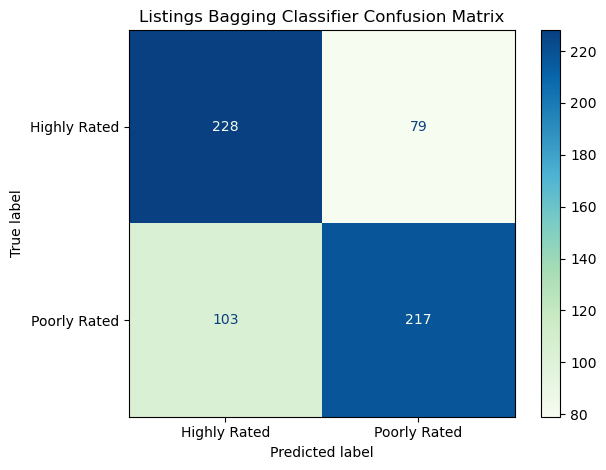

In [108]:
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_l, y_pred_bag),
                      display_labels=['Highly Rated', 'Poorly Rated']);
cmd.plot(cmap = 'GnBu')
plt.title('Listings Bagging Classifier Confusion Matrix')
plt.tight_layout()
plt.savefig('./visualizations/lbagcm.jpg', bbox_inches = 'tight');

In [57]:
#Sensitivity 
print(f' Sensitivity: {tp_bag / (tp_bag+fn_bag)}')
#Specificity
print(f' Specificity: {tn_bag / (tn_bag+fp_bag)}')
#Precision 
print(f' Precision: {tp_bag/(tp_bag+fp_bag)}')

 Sensitivity: 0.678125
 Specificity: 0.742671009771987
 Precision: 0.7331081081081081


The Bagging Classifier best parameters were: 'bag__max_features': 0.65, 'bag__max_samples': 0.65, 'bag__n_estimators': 150. This model had an accuracy score of 1.0 on the train data and 0.71 on the test data. On test data, the model sensitivity was 0.68, the model specificity was 0.74, and the model precision was 0.73. This model performed better than baseline accuracy but was substantially overfit.

# Reviews Classification Modeling

## Logistic Regression

In [58]:
rpipe_cvec_logreg = Pipeline([
    ('cvec', CountVectorizer(token_pattern = '[a-zA-Z0-9]+')),
    ('logreg', LogisticRegression(random_state = 222, max_iter=1000))
])

rpipe_cvec_logreg_params = {
    'cvec__stop_words': ['english', None],
    'cvec__ngram_range': [(1,1), (1,2)],
    'cvec__max_df': [0.9, 1.0], 
    'logreg__solver': ['lbfgs', 'liblinear']
}

rgs_cvec_logreg = GridSearchCV(rpipe_cvec_logreg, rpipe_cvec_logreg_params, n_jobs = -1)
rgs_cvec_logreg.fit(r_X_train, r_y_train)

GridSearchCV(estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(token_pattern='[a-zA-Z0-9]+')),
                                       ('logreg',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=222))]),
             n_jobs=-1,
             param_grid={'cvec__max_df': [0.9, 1.0],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': ['english', None],
                         'logreg__solver': ['lbfgs', 'liblinear']})

In [59]:
print(f' Train accuracy: {rgs_cvec_logreg.score(r_X_train, r_y_train)}, Test accuracy: {rgs_cvec_logreg.score(r_X_test, r_y_test)}')

 Train accuracy: 0.8633210934312525, Test accuracy: 0.7679598580345123


In [60]:
rgs_cvec_logreg.best_params_

{'cvec__max_df': 0.9,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': None,
 'logreg__solver': 'liblinear'}

In [61]:
ry_pred_logreg = rgs_cvec_logreg.predict(r_X_test)

In [62]:
rtn_lr, rfp_lr, rfn_lr, rtp_lr = confusion_matrix(r_y_test, ry_pred_logreg).ravel()

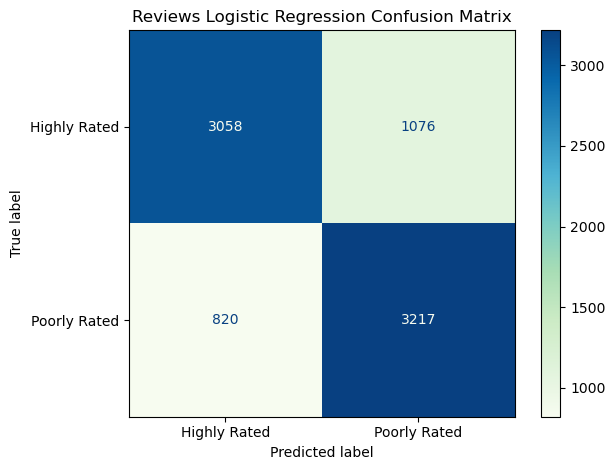

In [109]:
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(r_y_test, ry_pred_logreg),
                      display_labels=['Highly Rated', 'Poorly Rated']);
cmd.plot(cmap = 'GnBu')
plt.title('Reviews Logistic Regression Confusion Matrix')
plt.tight_layout()
plt.savefig('./visualizations/rlgcm.jpg', bbox_inches = 'tight');

In [64]:
#Sensitivity 
print(f' Sensitivity: {rtp_lr / (rtp_lr+rfn_lr)}')
#Specificity
print(f' Specificity: {rtn_lr / (rtn_lr+rfp_lr)}')
#Precision 
print(f' Precision: {rtp_lr/(rtp_lr+rfp_lr)}')

 Sensitivity: 0.7968788704483527
 Specificity: 0.7397194000967586
 Precision: 0.7493594223153972


The Logistic Regression best parameters were: 'cvec__max_df': 0.9, 'cvec__ngram_range': (1, 1),'cvec__stop_words': 'none',
 'logreg__solver': 'liblinear'. This model had an accuracy score of 0.86 on the train data and 0.77 on the test data. On test data, the model sensitivity was 0.80, the model specificity was 0.74, and the model precision was 0.75. This model performed better than our baseline, but there was some evidence of overfitting, seen by the decrease in performance from train data to test data. 

## K Neighbors Classifier

In [65]:
rpipe_cvec_knn = Pipeline([
    ('cvec', CountVectorizer(token_pattern = '[a-zA-Z0-9]+')),
    ('ss', StandardScaler(with_mean = False)),
    ('knn', KNeighborsClassifier())
])

rpipe_cvec_knn_params = {
    'cvec__stop_words': ['english', None],
    'cvec__ngram_range': [(1,1), (1,2)],
    'cvec__max_df': [0.9, 1.0],
    'knn__n_neighbors': [3, 5, 7],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['minkowski', 'euclidean', 'manhattan']
    
}

rgs_cvec_knn = GridSearchCV(rpipe_cvec_knn, rpipe_cvec_knn_params, n_jobs = -1)
rgs_cvec_knn.fit(r_X_train, r_y_train)

GridSearchCV(estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(token_pattern='[a-zA-Z0-9]+')),
                                       ('ss', StandardScaler(with_mean=False)),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'cvec__max_df': [0.9, 1.0],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': ['english', None],
                         'knn__metric': ['minkowski', 'euclidean', 'manhattan'],
                         'knn__n_neighbors': [3, 5, 7],
                         'knn__weights': ['uniform', 'distance']})

In [66]:
print(f' Train accuracy: {rgs_cvec_knn.score(r_X_train, r_y_train)}, Test accuracy: {rgs_cvec_knn.score(r_X_test, r_y_test)}')

 Train accuracy: 0.9923296613627091, Test accuracy: 0.6608738220536042


In [67]:
rgs_cvec_knn.best_params_

{'cvec__max_df': 0.9,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': 'english',
 'knn__metric': 'minkowski',
 'knn__n_neighbors': 7,
 'knn__weights': 'distance'}

In [68]:
ry_pred_knn = rgs_cvec_knn.predict(r_X_test)

In [69]:
rtn_knn, rfp_knn, rfn_knn, rtp_knn = confusion_matrix(r_y_test, ry_pred_knn).ravel()

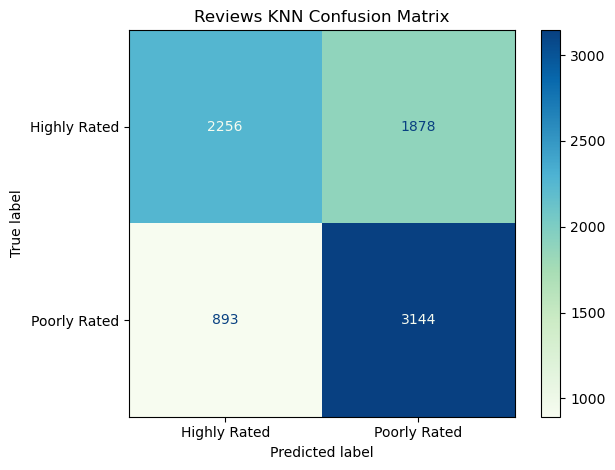

In [110]:
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(r_y_test, ry_pred_knn),
                      display_labels=['Highly Rated', 'Poorly Rated']);
cmd.plot(cmap = 'GnBu')
plt.title('Reviews KNN Confusion Matrix')
plt.tight_layout()
plt.savefig('./visualizations/rknncm.jpg', bbox_inches = 'tight');

In [71]:
#Sensitivity 
print(f' Sensitivity: {rtp_knn / (rtp_knn+rfn_knn)}')
#Specificity
print(f' Specificity: {rtn_knn / (rtn_knn+rfp_knn)}')
#Precision 
print(f' Precision: {rtp_knn/(rtp_knn+rfp_knn)}')

 Sensitivity: 0.7787961357443647
 Specificity: 0.5457184325108854
 Precision: 0.6260454002389486


The KNN best parameters were: 'cvec__max_df': 0.9, 'cvec__ngram_range': (1, 1), 'cvec__stop_words': 'english', 'knn__metric': 'minkowski', 'knn__n_neighbors': 7, 'knn__weights': 'distance'. This model had an accuracy score of 1 on the train data and 0.66 on the test data. This model was severely overfit. On test data, the model sensitivity was 0.78, the model specificity was 0.55, and the model precision was 0.63. This model had difficulty classifying highly rated listings, labeling them as poorly rated listings, as shown by the very low specificity score.

## Decision Tree

In [72]:
rpipe_cvec_dt = Pipeline([
    ('cvec', CountVectorizer(token_pattern = '[a-zA-Z0-9]+')),
    ('dt', DecisionTreeClassifier(random_state = 222))
])

rpipe_cvec_dt_params = {
    'cvec__stop_words': ['english', None],
    'cvec__ngram_range': [(1,1), (1,2)],
    'cvec__max_df': [0.9, 1.0],
    'dt__max_depth': [3, 5, 8],
    'dt__min_samples_leaf': [1, 2, 5]
    
}

rgs_cvec_dt = GridSearchCV(rpipe_cvec_dt, rpipe_cvec_dt_params, n_jobs = -1)
rgs_cvec_dt.fit(r_X_train, r_y_train)


GridSearchCV(estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(token_pattern='[a-zA-Z0-9]+')),
                                       ('dt',
                                        DecisionTreeClassifier(random_state=222))]),
             n_jobs=-1,
             param_grid={'cvec__max_df': [0.9, 1.0],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': ['english', None],
                         'dt__max_depth': [3, 5, 8],
                         'dt__min_samples_leaf': [1, 2, 5]})

In [73]:
print(f' Train accuracy: {rgs_cvec_dt.score(r_X_train, r_y_train)}, Test accuracy: {rgs_cvec_dt.score(r_X_test, r_y_test)}')

 Train accuracy: 0.6762545899632803, Test accuracy: 0.653897931709705


In [74]:
rgs_cvec_dt.best_params_

{'cvec__max_df': 0.9,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': None,
 'dt__max_depth': 8,
 'dt__min_samples_leaf': 5}

In [75]:
ry_pred_dt = rgs_cvec_dt.predict(r_X_test)

In [76]:
rtn_dt, rfp_dt, rfn_dt, rtp_dt = confusion_matrix(r_y_test, ry_pred_dt).ravel()

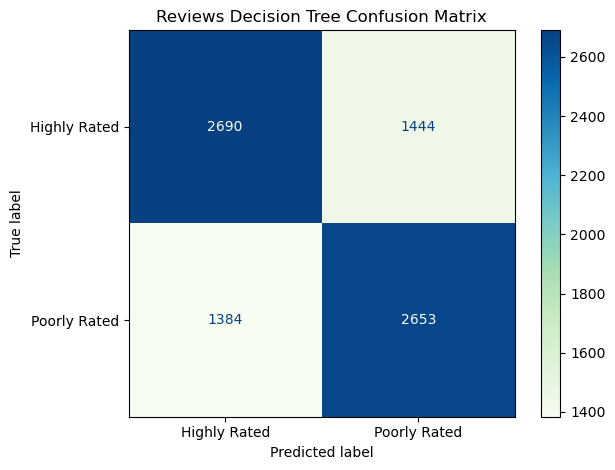

In [111]:
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(r_y_test, ry_pred_dt),
                      display_labels=['Highly Rated', 'Poorly Rated']);
cmd.plot(cmap = 'GnBu')
plt.title('Reviews Decision Tree Confusion Matrix')
plt.tight_layout()
plt.savefig('./visualizations/rdtcm.jpg', bbox_inches = 'tight');

In [78]:
#Sensitivity 
print(f' Sensitivity: {rtp_dt / (rtp_dt+rfn_dt)}')
#Specificity
print(f' Specificity: {rtn_dt / (rtn_dt+rfp_dt)}')
#Precision 
print(f' Precision: {rtp_dt/(rtp_dt+rfp_dt)}')

 Sensitivity: 0.6571711667079515
 Specificity: 0.6507014997581035
 Precision: 0.647546985599219


The Decision Tree best parameters were: 'cvec__max_df': 0.9, 'cvec__ngram_range': (1, 2), 'cvec__stop_words': None, 'dt__max_depth': 8, 'dt__min_samples_leaf': 5. This model had an accuracy score of 0.68 on the train data and 0.65 on the test data. On test data, the model sensitivity was 0.66, the model specificity was 0.65, and the model precision was 0.65. This model was not very accurate but classified highly rated properties and poorly rated properties with about the same accuracy.

## Random Forest

In [79]:
rpipe_cvec_rf = Pipeline([
    ('cvec', CountVectorizer(token_pattern = '[a-zA-Z0-9]+')),
    ('rf', RandomForestClassifier(random_state =222))
])

rpipe_cvec_rf_params = {
    'cvec__stop_words': ['english', None],
    'cvec__ngram_range': [(1,1), (1,2)],
    'cvec__max_df': [0.9, 1.0],
    'rf__n_estimators': [100, 125, 150],
    'rf__max_depth': [3, 5, 8],
    'rf__min_samples_leaf': [1, 2, 5]
    
}

rgs_cvec_rf = GridSearchCV(rpipe_cvec_rf, rpipe_cvec_rf_params, n_jobs = -1)
rgs_cvec_rf.fit(r_X_train, r_y_train)

GridSearchCV(estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(token_pattern='[a-zA-Z0-9]+')),
                                       ('rf',
                                        RandomForestClassifier(random_state=222))]),
             n_jobs=-1,
             param_grid={'cvec__max_df': [0.9, 1.0],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': ['english', None],
                         'rf__max_depth': [3, 5, 8],
                         'rf__min_samples_leaf': [1, 2, 5],
                         'rf__n_estimators': [100, 125, 150]})

In [80]:
print(f' Train accuracy: {rgs_cvec_rf.score(r_X_train, r_y_train)}, Test accuracy: {rgs_cvec_rf.score(r_X_test, r_y_test)}')

 Train accuracy: 0.7253365973072216, Test accuracy: 0.7123975033655612


In [81]:
rgs_cvec_rf.best_params_

{'cvec__max_df': 0.9,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': 'english',
 'rf__max_depth': 8,
 'rf__min_samples_leaf': 2,
 'rf__n_estimators': 150}

In [82]:
ry_pred_rf = rgs_cvec_rf.predict(r_X_test)

In [83]:
rtn_rf, rfp_rf, rfn_rf, rtp_rf = confusion_matrix(r_y_test, ry_pred_rf).ravel()

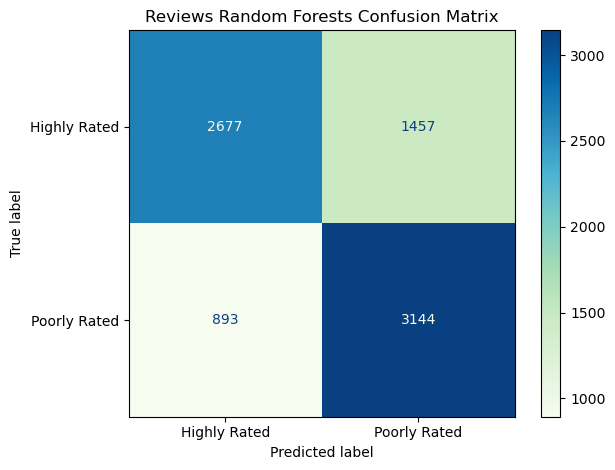

In [112]:
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(r_y_test, ry_pred_rf),
                      display_labels=['Highly Rated', 'Poorly Rated']);
cmd.plot(cmap = 'GnBu')
plt.title('Reviews Random Forests Confusion Matrix')
plt.tight_layout()
plt.savefig('./visualizations/rrfcm.jpg', bbox_inches = 'tight');

In [85]:
#Sensitivity 
print(f' Sensitivity: {rtp_rf / (rtp_rf+rfn_rf)}')
#Specificity
print(f' Specificity: {rtn_rf / (rtn_rf+rfp_rf)}')
#Precision 
print(f' Precision: {rtp_rf/(rtp_rf+rfp_rf)}')

 Sensitivity: 0.7787961357443647
 Specificity: 0.6475568456700532
 Precision: 0.683329710932406


The Random Forest best parameters were: 'cvec__max_df': 0.9, 'cvec__ngram_range': (1, 1), 'cvec__stop_words': English, 'rf__max_depth': 8, 'rf__min_samples_leaf': 2, 'rf__n_estimators': 150. This model had an accuracy score of 0.73 on the train data and 0.71 on the test data. On test data, the model sensitivity was 0.78, the model specificity was 0.65, and the model precision was 0.68. This model was better at classifying poorly rated listings correctly than highly rated listings, as seen by the lower specificity.

## ADA Boost

In [86]:
rpipe_cvec_ada = Pipeline([
    ('cvec', CountVectorizer(token_pattern = '[a-zA-Z0-9]+')),
    ('ada', AdaBoostClassifier(random_state =222))
])

rpipe_cvec_ada_params = {
    'cvec__stop_words': ['english', None],
    'cvec__ngram_range': [(1,1), (1,2)],
    'cvec__max_df': [0.9, 1.0],
    'ada__n_estimators': [100, 125, 150],
    'ada__learning_rate': [1.0, 1.5]
    
}

rgs_cvec_ada = GridSearchCV(rpipe_cvec_ada, rpipe_cvec_ada_params, n_jobs = -1)
rgs_cvec_ada.fit(r_X_train, r_y_train)

GridSearchCV(estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(token_pattern='[a-zA-Z0-9]+')),
                                       ('ada',
                                        AdaBoostClassifier(random_state=222))]),
             n_jobs=-1,
             param_grid={'ada__learning_rate': [1.0, 1.5],
                         'ada__n_estimators': [100, 125, 150],
                         'cvec__max_df': [0.9, 1.0],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': ['english', None]})

In [87]:
print(f' Train accuracy: {rgs_cvec_ada.score(r_X_train, r_y_train)}, Test accuracy: {rgs_cvec_ada.score(r_X_test, r_y_test)}')

 Train accuracy: 0.7527131782945736, Test accuracy: 0.7347937828907111


In [88]:
rgs_cvec_ada.best_params_

{'ada__learning_rate': 1.0,
 'ada__n_estimators': 150,
 'cvec__max_df': 0.9,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': None}

In [89]:
ry_pred_ada = rgs_cvec_ada.predict(r_X_test)

In [90]:
rtn_ada, rfp_ada, rfn_ada, rtp_ada = confusion_matrix(r_y_test, ry_pred_ada).ravel()

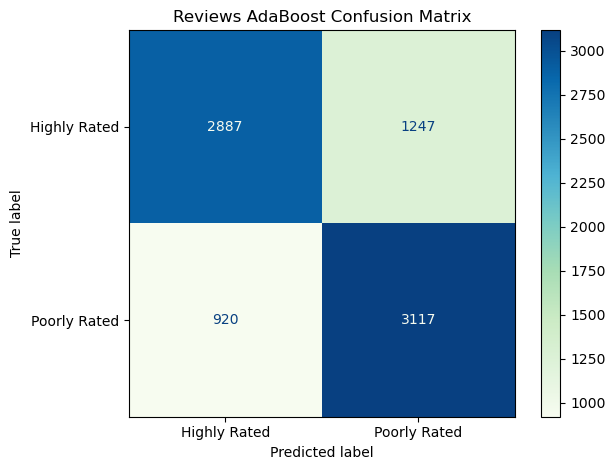

In [113]:
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(r_y_test, ry_pred_ada),
                      display_labels=['Highly Rated', 'Poorly Rated']);
cmd.plot(cmap = 'GnBu')
plt.title('Reviews AdaBoost Confusion Matrix')
plt.tight_layout()
plt.savefig('./visualizations/radacm.jpg', bbox_inches = 'tight');

In [92]:
#Sensitivity 
print(f' Sensitivity: {rtp_ada / (rtp_ada+rfn_ada)}')
#Specificity
print(f' Specificity: {rtn_ada / (rtn_ada+rfp_ada)}')
#Precision 
print(f' Precision: {rtp_ada/(rtp_ada+rfp_ada)}')

 Sensitivity: 0.7721080009908348
 Specificity: 0.6983551040154814
 Precision: 0.7142529789184234


The AdaBoost best parameters were: 'cvec__max_df': 0.9, 'cvec__ngram_range': (1, 2), 'cvec__stop_words': None, 'ada__learning_rate': 1.0, 'ada__n_estimators': 150. This model had an accuracy score of 0.75 on the train data and 0.73 on the test data. On test data, the model sensitivity was 0.77, the model specificity was 0.70, and the model precision was 0.71. This model performed comparably to the random forests model. The model was slightly better at accurately classifying poorly rated listings than highly rated listings. 

## Gradient Boost

In [93]:
rpipe_cvec_g = Pipeline([
    ('cvec', CountVectorizer(token_pattern = '[a-zA-Z0-9]+')),
    ('g_boost', GradientBoostingClassifier(random_state = 222))
])

rpipe_cvec_g_params = {
    'cvec__stop_words': ['english', None],
    'cvec__ngram_range': [(1,1), (1,2)],
    'cvec__max_df': [0.9, 1.0],
    'g_boost__n_estimators': [100, 125, 150],
    'g_boost__learning_rate': [0.8, 1.0, 1.5],
    'g_boost__min_samples_split': [2]
    
}

rgs_cvec_g = GridSearchCV(rpipe_cvec_g, rpipe_cvec_g_params, n_jobs = -1)
rgs_cvec_g.fit(r_X_train, r_y_train)

GridSearchCV(estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(token_pattern='[a-zA-Z0-9]+')),
                                       ('g_boost',
                                        GradientBoostingClassifier(random_state=222))]),
             n_jobs=-1,
             param_grid={'cvec__max_df': [0.9, 1.0],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': ['english', None],
                         'g_boost__learning_rate': [0.8, 1.0, 1.5],
                         'g_boost__min_samples_split': [2],
                         'g_boost__n_estimators': [100, 125, 150]})

In [94]:
print(f' Train accuracy: {rgs_cvec_g.score(r_X_train, r_y_train)}, Test accuracy: {rgs_cvec_g.score(r_X_test, r_y_test)}')

 Train accuracy: 0.8013463892288861, Test accuracy: 0.7481336433729042


In [95]:
rgs_cvec_g.best_params_

{'cvec__max_df': 0.9,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': None,
 'g_boost__learning_rate': 0.8,
 'g_boost__min_samples_split': 2,
 'g_boost__n_estimators': 150}

In [96]:
ry_pred_g = rgs_cvec_g.predict(r_X_test)

In [97]:
rtn_g, rfp_g, rfn_g, rtp_g = confusion_matrix(r_y_test, ry_pred_g).ravel()

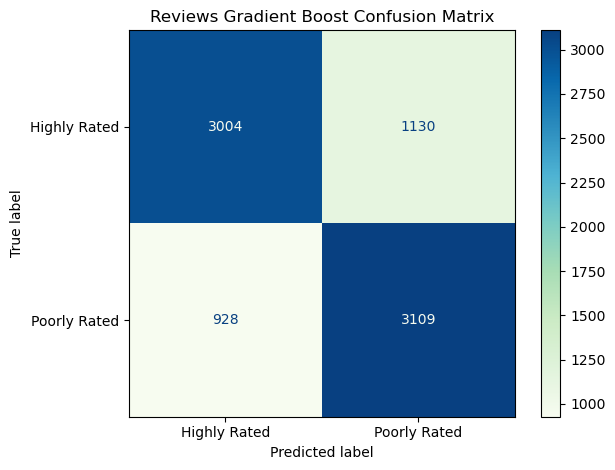

In [114]:
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(r_y_test, ry_pred_g),
                      display_labels=['Highly Rated', 'Poorly Rated']);
cmd.plot(cmap = 'GnBu')
plt.title('Reviews Gradient Boost Confusion Matrix')
plt.tight_layout()
plt.savefig('./visualizations/rgbcm.jpg', bbox_inches = 'tight');

In [99]:
#Sensitivity 
print(f' Sensitivity: {rtp_g / (rtp_g+rfn_g)}')
#Specificity
print(f' Specificity: {rtn_g / (rtn_g+rfp_g)}')
#Precision 
print(f' Precision: {rtp_g/(rtp_g+rfp_g)}')

 Sensitivity: 0.7701263314342334
 Specificity: 0.7266569908079342
 Precision: 0.7334276952111347


The GradientBoost best parameters were: 'cvec__max_df': 0.9, 'cvec__ngram_range': (1, 1), 'cvec__stop_words': None, 'g_boost__learning_rate': 0.8, 'g_boost__n_estimators': 150. This model had an accuracy score of 0.80 on the train data and 0.75 on the test data. On test data, the model sensitivity was 0.77, the model specificity was 0.73, and the model precision was 0.73. The model was slightly better at accurately classifying poorly rated listings than highly rated listings. 

## Bagging Classifier

In [101]:
# rpipe_cvec_bag = Pipeline([
#     ('cvec', CountVectorizer(token_pattern = '[a-zA-Z0-9]+')),
#     ('bag', BaggingClassifier(random_state = 222))
# ])

# rpipe_cvec_bag_params = {
#     'cvec__stop_words': ['english', None],
#     'cvec__ngram_range': [(1,1), (1,2)],
#     'cvec__max_df': [0.9, 1.0],
#     'bag__n_estimators': [50, 100, 150],
#     'bag__max_samples': [0.65, 0.75, 0.85, 1.0],
#     'bag__max_features': [0.65, 0.75, 0.85, 1.0]
    
# }

# rgs_cvec_bag = GridSearchCV(rpipe_cvec_bag, rpipe_cvec_bag_params, n_jobs = -1)
# rgs_cvec_bag.fit(r_X_train, r_y_train)

In [ ]:
# print(f' Train accuracy: {rgs_cvec_bag.score(r_X_train, r_y_train)}, Test accuracy: {rgs_cvec_bag.score(r_X_test, r_y_test)}')

In [ ]:
# rgs_cvec_bag.best_params_

In [ ]:
# ry_pred_bag = rgs_cvec_bag.predict(r_X_test)

In [ ]:
# rtn_bag, rfp_bag, rfn_bag, rtp_bag = confusion_matrix(r_y_test, ry_pred_bag).ravel()

In [ ]:
# cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(r_y_test, ry_pred_bag),
#                       display_labels=['Highly Rated', 'Poorly Rated']);
# cmd.plot(cmap = 'GnBu')
# plt.title('Reviews Bagging Classifier Confusion Matrix')
# plt.tight_layout();

In [ ]:
# #Sensitivity 
# print(f' Sensitivity: {rtp_bag / (rtp_bag+rfn_bag)}')
# #Specificity
# print(f' Specificity: {rtn_bag / (rtn_bag+rfp_bag)}')
# #Precision 
# print(f' Precision: {rtp_bag/(rtp_bag+rfp_bag)}')

Our bagging classifier model ran for over 24 hours both times we tried to fit it and we were not able to fit the model and score it by the time of this capstone's completion. We left the code in (but commented out) so that in the future, we can run this model again to see if it best predicts our classes.